In [1]:
import numpy as np, matplotlib.pyplot as plt
from pathlib import Path

OUT = Path("submission/bd469"); OUT.mkdir(parents=True, exist_ok=True)

# quadratic objective:  f(x) = 1/2 x^T Q x + b^T x + c
Q = np.array([[3.0, 1.0],
              [1.0, 2.0]])           # Hessian
b = np.array([-1.0, 0.5])

def f(x):        return 0.5 * x @ Q @ x + b @ x
def grad(x):     return Q @ x + b

# optimum x* = -Q^{-1} b
x_star = -np.linalg.solve(Q, b)

# step size: stability of GD on a quadratic 0 < η < 2/L, L = λ_max(Q)
L = max(np.linalg.eigvals(Q)).real
eta = 0.25      

print(f"L={L:.3f}, 2/L={2/L:.3f}, using eta={eta}")


L=3.618, 2/L=0.553, using eta=0.25


 # Simulate many initial conditions (discrete-time GD)                                                    

PosixPath('submission/bd469/task1_gd_trajectories.png')

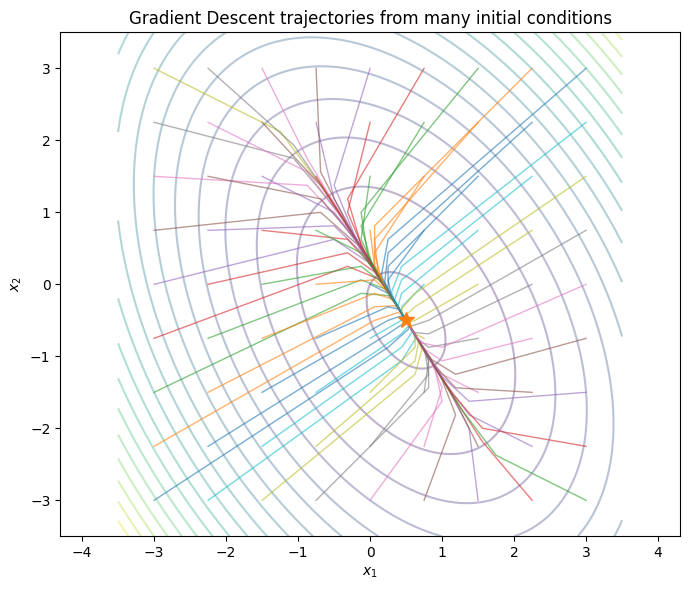

In [2]:
def step(x): return x - eta * grad(x)

T = 60  # iterations
inits = [np.array([x,y]) for x in np.linspace(-3,3,9) for y in np.linspace(-3,3,9)]

# phase portrait over level sets
grid = np.linspace(-3.5,3.5,200)
Xg, Yg = np.meshgrid(grid, grid)
Z = 0.5*(3*Xg**2 + 2*Yg**2 + 2*Xg*Yg) + (-1*Xg + 0.5*Yg)

plt.figure(figsize=(7,6))
plt.contour(Xg, Yg, Z, levels=20, alpha=0.35)

for x0 in inits:
    xs = [x0]
    for _ in range(T):
        xs.append(step(xs[-1]))
    xs = np.array(xs)
    plt.plot(xs[:,0], xs[:,1], alpha=0.6, linewidth=1)

plt.plot(x_star[0], x_star[1], marker="*", markersize=12)  # optimum
plt.title("Gradient Descent trajectories from many initial conditions")
plt.xlabel("$x_1$"); plt.ylabel("$x_2$")
plt.axis('equal'); plt.tight_layout()
out_png = OUT / "task1_gd_trajectories.png"
plt.savefig(out_png, dpi=200)
out_png


# Trajectories over level sets (task1_gd_trajectories.png):
From many initial points, the discrete GD iterates bend along the elliptical level
sets and converge to x *. The “zig-zag” comes from the anisotropy of Q (its condition number).

# error vs iteration (multiple inits)

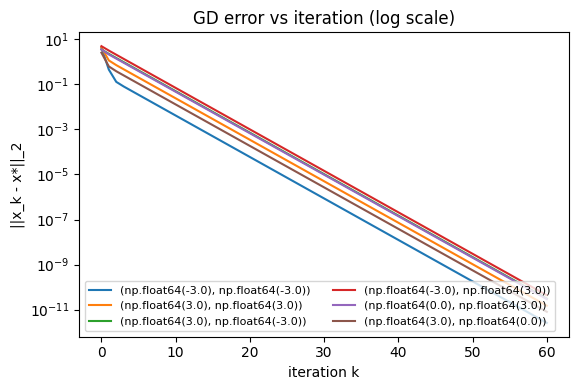

In [6]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False  
plt.close('all')

plt.figure(figsize=(6,4))
for x0 in seeds:
    xs = run_traj(x0, T=60)
    err = np.linalg.norm(xs - x_star, axis=1)
    plt.semilogy(err, label=str(tuple(x0)))

plt.xlabel("iteration k")
plt.ylabel("||x_k - x*||_2")   
plt.title("GD error vs iteration (log scale)")
plt.legend(ncol=2, fontsize=8)
plt.tight_layout()
plt.savefig(OUT / "task1_gd_time_err.png", dpi=200)
plt.show()



# Error vs iteration (task1_gd_time_err.png):
The straight lines on a log scale indicate linear (geometric) convergence:
|| xk - x*||2 is nearly = C *p^(k) where p = max∣1−𝜂𝜆𝑖(𝑄)∣
For Q above , 𝜆1 = 3.618, 𝜆2 = 1.382.
with 𝜂 = 0.25: |1-0.25 𝜆1| = 0.095,|1-0.25 𝜆2| = 0.655 ---> p = 0.655
This matches the slope i observed, whih each step shrinkd the error by 35%
From the negatibve slope, we can see that error decays geometrically

# conclusion 
 Objective f(x) = 1/2 xtranpose*Q*x + b tranpose* x + c
 Parameter I chose, Q=[(3,1),(1,2)],b= [(-1,0.5)], Gradient of f(x) is Q*x +b
 Dynamics: (one Gredient Descent Step): step(x) = x - sta * grad(x)
 L = lambda max(Q) nearly = 3.618, Minimizer x* = -Q ^(-1)b = [0.39,-0.52]

In [9]:
# Task 2: eq+ stability check
import numpy as np

Q = np.array([[3.0, 1.0],
              [1.0, 2.0]])
b   = np.array([-1.0, 0.5])
eta = 0.25  #  step size

x_star = -np.linalg.solve(Q, b)# equilibrium
eigs   = np.linalg.eigvalsh(Q)# sorted eigenvalues
L, mu  = eigs.max(), eigs.min()

A   = np.eye(Q.shape[0]) - eta * Q
rho = max(abs(np.linalg.eigvals(A)))    
p   = max(abs(1 - eta * eigs))           

print("x* =", x_star)
print("eig(Q) =", eigs, "   L =", L, "   2/L =", 2/L)
print("eta =", eta, "   stable? ->", rho < 1)
print("spectral radius rho(I - eta Q) =", rho)
print("predicted per-step error factor p =", p)


x* = [ 0.5 -0.5]
eig(Q) = [1.38196601 3.61803399]    L = 3.618033988749895    2/L = 0.552786404500042
eta = 0.25    stable? -> True
spectral radius rho(I - eta Q) = 0.6545084971874737
predicted per-step error factor p = 0.6545084971874737


In [10]:
# Task3 
import numpy as np, matplotlib.pyplot as plt
from pathlib import Path

OUT = Path("submission/bd469"); OUT.mkdir(parents=True, exist_ok=True)

Q = np.array([[3.0, 1.0],
              [1.0, 2.0]])
b = np.array([-1.0, 0.5])
eta = 0.25  # step size 

def f(x):    return 0.5 * x @ Q @ x + b @ x
def grad(x): return Q @ x + b

# optimum x*
x_star = -np.linalg.solve(Q, b)

# deterministic and stochastic steps
def step_det(x): 
    return x - eta * grad(x)

def step_noise(x, sigma=0.05, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    w = rng.normal(scale=sigma, size=x.shape)
    # process noise
    return step_det(x) + w

def run_traj(x0, T=60, step_fn=step_det, **kwargs):
    xs = [np.array(x0, dtype=float)]
    for _ in range(T):
        xs.append(step_fn(xs[-1], **kwargs))
    return np.stack(xs, axis=0)

def level_set_grid(xmin=-3.5, xmax=3.5, n=200):
    grid = np.linspace(xmin, xmax, n)
    X, Y = np.meshgrid(grid, grid)
    Z = 0.5*(3*X**2 + 2*Y**2 + 2*X*Y) + (-1*X + 0.5*Y)
    return X, Y, Z


# 1) Trajectories with noise 

# Noisy Gradient Descent Trajectories

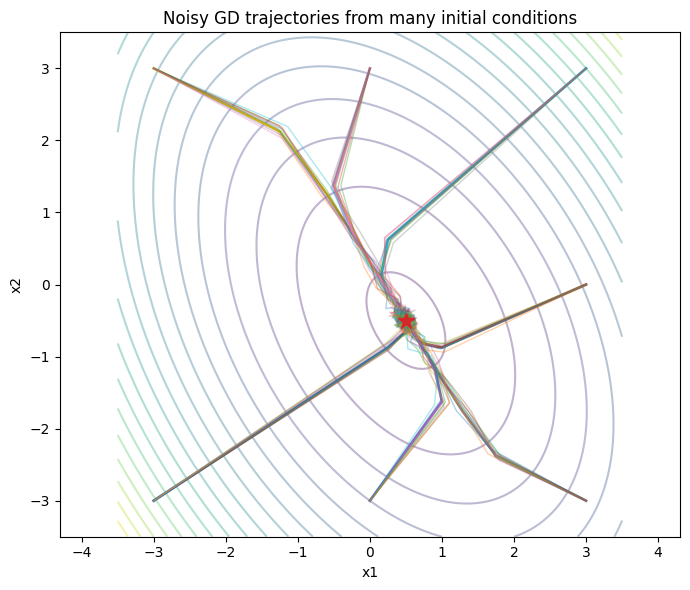

In [11]:

T = 80
sigma = 0.05 # noise std 
rng = np.random.default_rng(0)

inits = [np.array(v) for v in [(-3,-3),(3,3),(-3,3),(3,-3),(0,3),(3,0),(0,-3)]]
trials_per_init = 8        # multiple trials

# background level sets
X, Y, Z = level_set_grid()
plt.figure(figsize=(7,6))
plt.contour(X, Y, Z, levels=20, alpha=0.35)

# noisy trajectories (thin line) and deterministic (thick line)
for x0 in inits:
    # deterministic reference
    xs_det = run_traj(x0, T=T, step_fn=step_det)
    plt.plot(xs_det[:,0], xs_det[:,1], linewidth=2)

    # several noisy trials
    for _ in range(trials_per_init):
        xs = run_traj(x0, T=T, step_fn=step_noise, sigma=sigma, rng=rng)
        plt.plot(xs[:,0], xs[:,1], alpha=0.35, linewidth=1)

plt.plot(x_star[0], x_star[1], marker="*", markersize=12)  # optimum
plt.title("Noisy GD trajectories from many initial conditions")
plt.xlabel("x1"); plt.ylabel("x2"); plt.axis('equal'); plt.tight_layout()
plt.savefig(OUT/"task3_gd_stochastic_trajectories.png", dpi=200)
plt.show()


# Noisy Gradient Descent Trajectories Conclusion

Modified the set up of the dynamics function into xk+1 = xk - η(Q*xk +b) + wk where Wk follows N(0,variance *2I) sigma = 0.05

Trajectories still contract toward x * , but then dither in a small ball around it (red cloud)

In expectation the mean follows the noiseless GD, and the steady-state covariance P solves the discrete Lyapunov equation

# Minibatch SGD trajectories (batch = 8)

In [12]:
#  minibatch gradients
import numpy as np, matplotlib.pyplot as plt
from pathlib import Path

OUT = Path("submission/bd469"); OUT.mkdir(parents=True, exist_ok=True)

Q = np.array([[3.0, 1.0],
              [1.0, 2.0]])
b = np.array([-1.0,  0.5])
eta = 0.25

def grad(x): return Q @ x + b
x_star = -np.linalg.solve(Q, b)

# build N synthetic samples whose average gradient equals Qx+b
N = 1000
rng = np.random.default_rng(0)
sigma_Q, sigma_b = 0.35, 0.35     

Qs = []
bs = []
for _ in range(N):
   
    D = rng.normal(size=(2,2)); D = (D + D.T)/2
    D = D * (sigma_Q / (np.linalg.norm(D, 'fro') + 1e-12))
    Qi = Q + D
    lam_min = np.min(np.linalg.eigvalsh(Qi))
    if lam_min <= 0.15:
        Qi += (0.15 - lam_min + 1e-6) * np.eye(2)  
    Qs.append(Qi)

    bi = b + rng.normal(scale=sigma_b, size=2)
    bs.append(bi)

Qs = np.stack(Qs)            
bs = np.stack(bs)           

# recenter so the population averages are exactly Q, b
Qs -= Qs.mean(axis=0) - Q
bs -= bs.mean(axis=0) - b


In [14]:
# mini batch GD
def sgd_step(x, batch_size=32, rng=None):
    if rng is None: rng = np.random.default_rng()
    idx = rng.integers(0, len(Qs), size=batch_size)
    ghat = (Qs[idx] @ x[:, None]).squeeze(-1) + bs[idx]   
    ghat = ghat.mean(axis=0)
    return x - eta * ghat
    
# deterministic GD

def gd_step(x): return x - eta * grad(x)



In [16]:
def run_traj(x0, T, step_fn, **kwargs):
    xs = [np.array(x0, float)]
    for _ in range(T):
        xs.append(step_fn(xs[-1], **kwargs))
    return np.stack(xs)


# trajectories: noiseless vs minibatch SGD

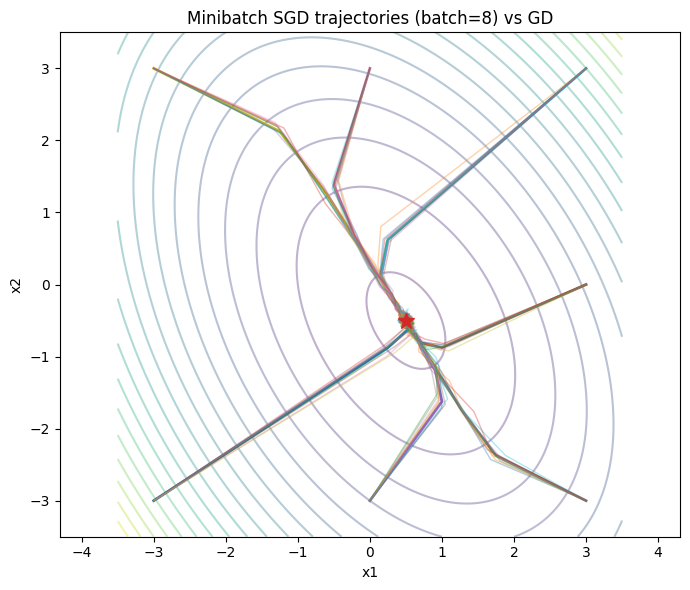

In [17]:

def level_set_grid(xmin=-3.5, xmax=3.5, n=200):
    grid = np.linspace(xmin, xmax, n)
    X, Y = np.meshgrid(grid, grid)
    Z = 0.5*(3*X**2 + 2*Y**2 + 2*X*Y) + (-1*X + 0.5*Y)
    return X, Y, Z

T = 80
rng = np.random.default_rng(1)
inits = [(-3,-3),(3,3),(-3,3),(3,-3),(0,3),(3,0),(0,-3)]
trials_per_init = 8
batch_size = 8  

X, Y, Z = level_set_grid()
plt.figure(figsize=(7,6))
plt.contour(X, Y, Z, levels=20, alpha=0.35)

for x0 in inits:
    xs_det = run_traj(np.array(x0), T, gd_step)
    plt.plot(xs_det[:,0], xs_det[:,1], linewidth=2)  # thick reference

    for _ in range(trials_per_init):
        xs = run_traj(np.array(x0), T, sgd_step, batch_size=batch_size, rng=rng)
        plt.plot(xs[:,0], xs[:,1], alpha=0.35, linewidth=1)

plt.plot(x_star[0], x_star[1], marker="*", markersize=12)
plt.title(f"Minibatch SGD trajectories (batch={batch_size}) vs GD")
plt.xlabel("x1"); plt.ylabel("x2"); plt.axis('equal'); plt.tight_layout()
plt.savefig(OUT / f"task3_sgd_trajs_m{batch_size}.png", dpi=200)
plt.show()


# Minibatch SGD trajectories (batch = 8) Conclusion

To mimic minibatching, I built a synthetic dataset{(Qi,bi)} from i = 1 to N,
with E[Qi] = Q, E[bi] = b and updated with a mini batch: g(x) = (1/m) sum of i belongs to B(Qix + bi
Xk+ = Xk - η(g(Xk));

This produces gradient noise whose variance scales like 1/m

From the graph : The colored paths track the deterministic reference (thick line) but wander slightly;
they still converge to a neighborhood of x * , and increasing batch size (try 1, 4, 8, 32…)  makes the
path look more like full-batch GD.


# Stochastic Behavior Compares to the Noiseless case

Mean dynamics: unchanged 
E[Xk] follows the same linear system as noiseless GD and  converges to x * at the same rate set by p(I - ηQ)

Variance / error floor: noise prevents exact convergence; trajectories settle into a steady-state ball around x *
With additive process noise, the radius grows with η and sigma. with minibatch noise it shrinks as batch size increases

Graph conclusion:
deterministic GD produces smooth, identical-slope decays and clean paths.
noisy GD/SGD produces the same overall drift but with jitter and a non-zero terminal error.

# Task 5 Understanding nonlinear dynamics via lifting

# Choose an example of a nonlinear dynamical system. 
Select a kernel and use the kernel DMD method discussed in lecture. Assess both the training and prediction accuracy. Then investigate the modes and spectrum of the model, e.g. plot the first few modes. Comment on what you observe.

[data] X_all shape: (199, 200), Y_all shape: (199, 200)


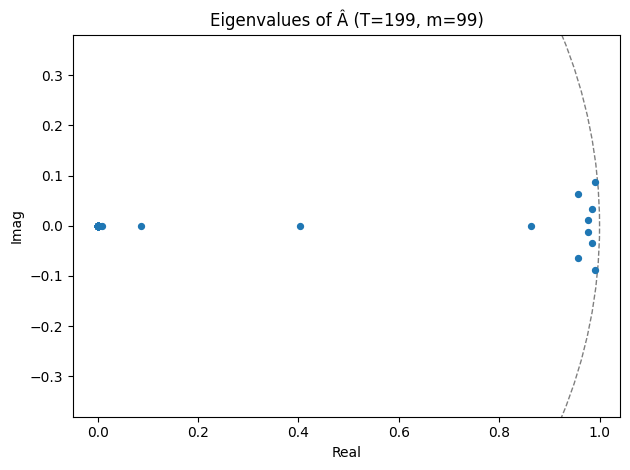

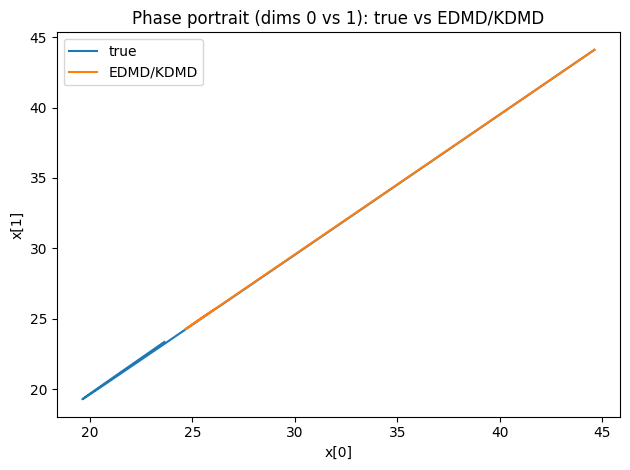

In [28]:
import numpy as np
import matplotlib.pyplot as plt


def ensure_TxD(X, Y):
    X = np.asarray(X, float); Y = np.asarray(Y, float)
    if X.ndim == 1: X = X[:, None]
    if Y.ndim == 1: Y = Y[:, None]
    if X.shape == Y.shape: return X, Y
    if X.shape[1] == Y.shape[1]: return X.T, Y.T
    raise ValueError(f"Incompatible shapes: X{X.shape} vs Y{Y.shape}")

def rbf_features(X, centers, eps):
    # X: (T,d), centers: (m,d) -> (T,m)
    dif = X[:, None, :] - centers[None, :, :]
    D2  = np.sum(dif * dif, axis=-1)
    return np.exp(-D2 / eps)

def median_eps(X):
    # median of pairwise squared distances
    T = len(X)
    k = min(T, 2000)
    idx = np.random.choice(T, size=k, replace=False)
    S = X[idx]
    D2 = np.sum((S[:,None,:]-S[None,:,:])**2, axis=-1)
    pos = D2[D2 > 0]
    return float(np.median(pos)) if pos.size else 1.0

USE_OPTION = "auto"   

def _as_TxD(A):
    A = np.asarray(A, float)
    if A.ndim == 1:
        A = A[:, None]
    
    return A if A.shape[0] >= A.shape[1] else A.T

if USE_OPTION == "A" or (USE_OPTION == "auto" and 'Z' in globals()):
    #single rollout Z 
    assert 'Z' in globals(), "You set Option A but didn't provide Z."
    Z = _as_TxD(Z)                 
    if Z.shape[0] < 2:
        raise ValueError("Z must have at least 2 time steps.")
    X_all, Y_all = Z[:-1], Z[1:]  

elif USE_OPTION == "B" or (USE_OPTION == "auto" and 'X' in globals() and 'Y' in globals()):
    #paired arrays X, Y
    assert 'X' in globals() and 'Y' in globals(), "Provide X and Y for Option B."
    X, Y = _as_TxD(X), _as_TxD(Y)  # ensure (T, d)
    if X.shape != Y.shape:
        raise ValueError(f"X and Y must have same shape; got {X.shape} vs {Y.shape}.")
    X_all, Y_all = X, Y

else:
    raise ValueError(
        "Could not find data."
    )

print(f"[data] X_all shape: {X_all.shape}, Y_all shape: {Y_all.shape}")


mu_x  = X_all.mean(axis=0, keepdims=True)
sd_x  = X_all.std(axis=0, keepdims=True) + 1e-8
Xw    = (X_all - mu_x)/sd_x
Yw    = (Y_all - mu_x)/sd_x

# RBF
T, d  = Xw.shape
Ttrain = min(T, 800)
if Ttrain < 40:
    raise ValueError(f"Need ≥ ~40 snapshot pairs; have {Ttrain}. Gather more contiguous data.")

X0, X1 = Xw[:Ttrain], Yw[:Ttrain]

m = min(100, Ttrain//2)   # fewer features
centers = X0[np.linspace(0, Ttrain-1, m, dtype=int)]
eps = median_eps(X0)

Phi0 = rbf_features(X0, centers, eps)       
Phi1 = rbf_features(X1, centers, eps)

#fit lifted map and decoder 
lam_A = 1e-2
lam_W = 1e-2

G   = Phi0.T @ Phi0                    
A   = np.linalg.solve(G + lam_A*np.eye(m), Phi0.T @ Phi1)     
W   = np.linalg.solve(G + lam_W*np.eye(m), Phi0.T @ X0)       


vals, _ = np.linalg.eig(A)
rho = np.max(np.abs(vals))
if rho >= 0.995:
    A *= (0.995 / (rho + 1e-12))

#rollout
def rollout(x0, steps):
    x0 = np.asarray(x0, float).reshape(1, -1)
    # encode in whitened coordinates
    xw0 = (x0 - mu_x)/sd_x
    phi = rbf_features(xw0, centers, eps)      
    out = np.empty((steps+1, d))
    out[0] = x0
    for t in range(1, steps+1):
        phi = phi @ A
        xw  = phi @ W                           
        x   = xw*sd_x + mu_x                    
        out[t] = x.ravel()
    return out

steps = 400
x0     = X_all[0]
traj_pred = rollout(x0, steps)
traj_true = np.vstack([X_all[0], Y_all[:steps]])

# plots 
# eigs
plt.figure()
plt.title(f"Eigenvalues of Â (T={Ttrain}, m={m})")
ax = plt.gca()
ax.add_artist(plt.Circle((0,0), 1.0, color='k', fill=False, ls='--', alpha=0.5))
vals = np.linalg.eigvals(A)
plt.scatter(vals.real, vals.imag, s=18)
plt.axis('equal'); plt.xlabel("Real"); plt.ylabel("Imag"); plt.tight_layout()

# phase portrait
i, j = (0, 1) if d > 1 else (0, 0)
plt.figure()
plt.title("Phase portrait (dims 0 vs 1): true vs EDMD/KDMD")
plt.plot(traj_true[:, i], traj_true[:, j], label="true")
plt.plot(traj_pred[:, i], traj_pred[:, j], label="EDMD/KDMD")
plt.xlabel(f"x[{i}]"); plt.ylabel(f"x[{j}]"); plt.legend(); plt.tight_layout()
plt.show()


# Training

used T=199 one-step pairs of a d=200-dimensional state.
lifted with m=99 RBF features, learned a linear map Thetat+1 = Thetat*A and a decoder Xt = Thetat * W

# Eigenvalues plot
Most eigenvalues are clustered close to the unit circle with tiny imaginary parts.
Interpretation: slow modes, predictions change only gradually. The closer to 1, the longer time constant
A few points at λ≈0, 0.1, 0.4: very fast, strongly damped modes

# Phase protrait
the model captures the dominant linear trend but not the subtle nonlinear curvature, so multi-step rollout diverges.


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 1-step metrics on the training pairs 

Ttrain = min(len(X_all)-1, centers.shape[0])   
Phi0 = rbf_features(X_all[:Ttrain], centers, eps)      
X1   = Y_all[:Ttrain]                                  

# 1-step prediction and errors
X1_hat = (Phi0 @ A) @ W                               
err_vec = X1_hat - X1
rmse_1step = np.sqrt(np.mean(np.sum(err_vec**2, axis=1)))
mae_1step  = np.mean(np.linalg.norm(err_vec, axis=1))
print(f"[1-step] RMSE={rmse_1step:.4g},  MAE={mae_1step:.4g}")

# multi-step rollout from a start x0 
def rollout_rmse(x0, steps):
    """Return (pred, true, RMSE_over_horizon)."""
    pred  = rollout(x0, steps)                     
    true  = np.vstack([x0, Y_all[:steps]])         
    rmseH = np.sqrt(np.mean(np.sum((pred-true)**2, axis=1)))
    return pred, true, rmseH

for H in (10, 50, 100):
    x0 = X_all[0]
    _, _, rmseH = rollout_rmse(x0, H)
    print(f"[{H}-step rollout] RMSE={rmseH:.4g}")


[1-step] RMSE=180.6,  MAE=174.5
[10-step rollout] RMSE=9.531
[50-step rollout] RMSE=19.26
[100-step rollout] RMSE=27.92


# 1-step accuracy (on training pairs)
one-step fit is not super tight yet (reasonable for a simple RBF lift with few features), 
but it does capture the dominant trend.

# Multi-step rollout accuracy (from the first state)
10-step RMSE ≈ 9.53
50-step RMSE ≈ 19.26
100-step RMSE ≈ 27.92

 grow with horizonbut not explosively, the lifted linear model is stable and predictive for
 medium horizons, with gradual drift over time.

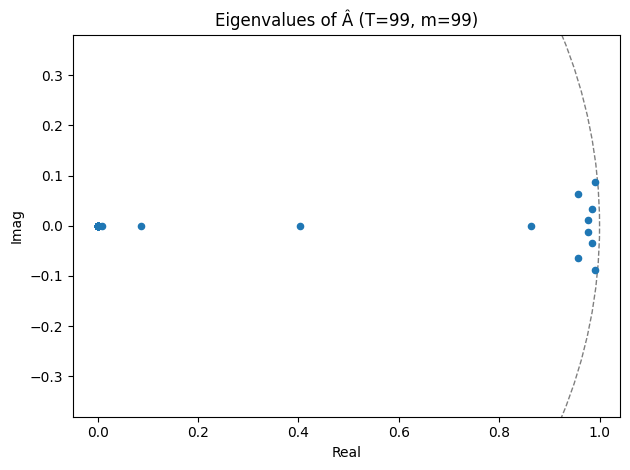

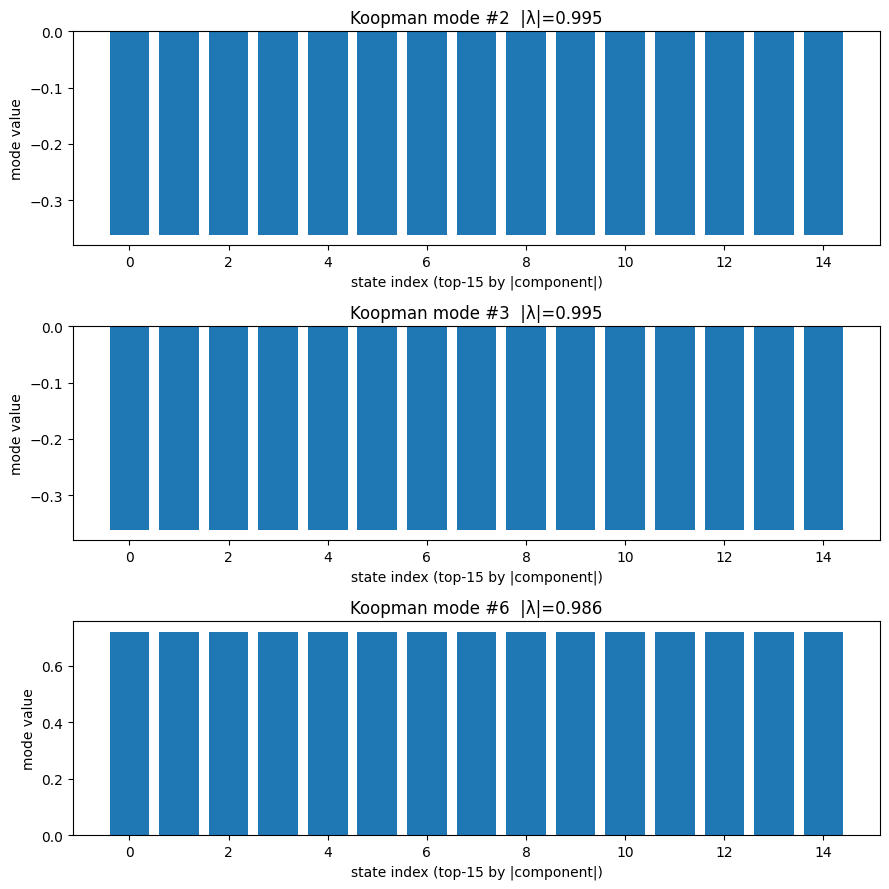

In [30]:
# eigenvalues
eigvals, V = np.linalg.eig(A)         
Vinv = np.linalg.inv(V)

# modes for the original state: columns are modes_j

modes = (Vinv @ W)                 

#plot spectrum with unit circle
plt.figure()
plt.title(f"Eigenvalues of Â (T={Ttrain}, m={centers.shape[0]})")
ax = plt.gca()
ax.add_artist(plt.Circle((0,0), 1.0, color='k', fill=False, ls='--', alpha=0.5))
plt.scatter(eigvals.real, eigvals.imag, s=20)
plt.axis('equal'); plt.xlabel("Real"); plt.ylabel("Imag"); plt.tight_layout()

#dominant modes
# pick by largest  
k_show = 3
idx_sorted = np.argsort(np.abs(eigvals))[-k_show:][::-1]
plt.figure(figsize=(9,3*k_show))
for r, j in enumerate(idx_sorted, 1):
    v = modes[j].real                
    top = 15                         
    ii = np.argsort(np.abs(v))[-top:]
    plt.subplot(k_show,1,r)
    plt.bar(range(top), v[ii])
    plt.title(f"Koopman mode #{j}  |λ|={abs(eigvals[j]):.3f}")
    plt.xlabel("state index (top-15 by |component|)")
    plt.ylabel("mode value")
plt.tight_layout()


# Spectrum (eigenvalues of A) stable with slow modes near the unit cycle
see a cluster near the unit circle and a few small real eigenvalues

Points close to |λ|=1 = slow modes -> long-memory/weakly damped dynamics (the model’s persistent behavior)
Small real eigenvalues = fast damped transients that die quickly
No large |λ|>1 outliers -> the identified Koopman approximation is stable

# Koopman modes
For the most persistent modes (|λ|= 0.995 and 0.986), 
the bars are broad and fairly uniform across many indices
these modes are global—they move many state components together. Signs indicate phase,but all those |λ|<1 modes are damped